In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
waste_production = pd.read_csv('https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Plastic%20Waste%20Generation%20values.csv',index_col= 'year')

In [3]:
waste_production

,production_volume
year,
1950-01-01,1.5
1976-01-01,50.0
1989-01-01,100.0
2002-01-01,200.0
2008-01-01,245.0
2009-01-01,250.0
2010-01-01,270.0
2011-01-01,279.0
2012-01-01,288.0


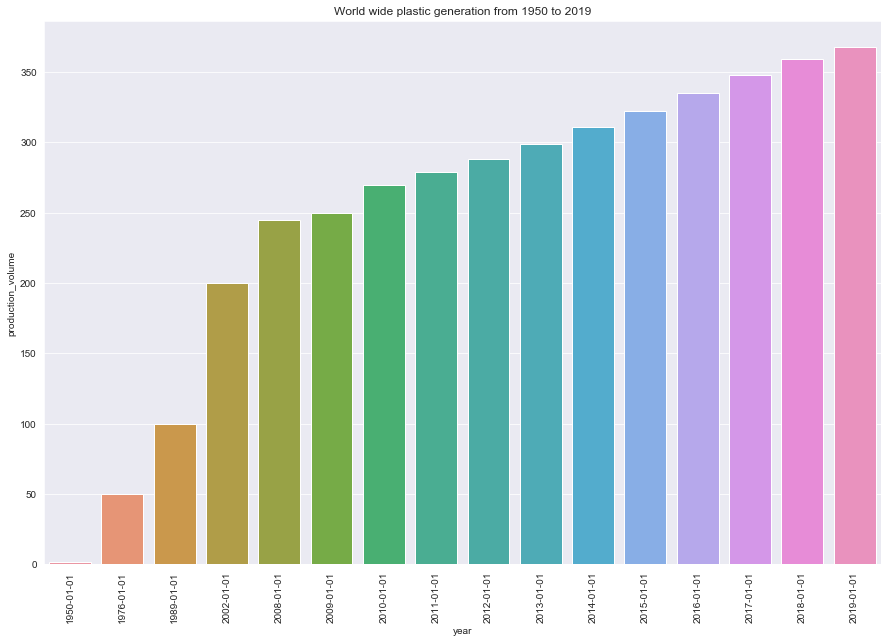

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x=waste_production.index,y=waste_production['production_volume'])
plt.title("World wide plastic generation from 1950 to 2019")
plt.xticks(rotation=90)
plt.show()

In [5]:
waste_production_lastDecade = pd.read_csv('https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Plastic%20Waste%20Generation%20over%20past%2010%20years.csv', index_col= 'year')


In [6]:
waste_production_lastDecade

,production_volume
year,
2010-01-01,270
2011-01-01,279
2012-01-01,288
2013-01-01,299
2014-01-01,311
2015-01-01,322
2016-01-01,335
2017-01-01,348
2018-01-01,359


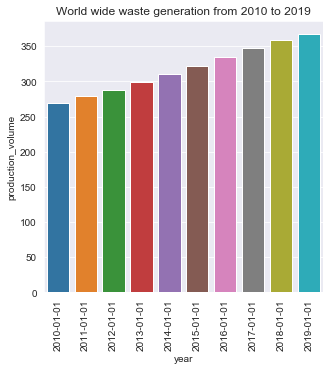

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.barplot(x=waste_production_lastDecade.index,y=waste_production_lastDecade['production_volume'])
plt.title("World wide waste generation from 2010 to 2019")
plt.xticks(rotation=90)
plt.show()

In [9]:
print('shape of data', waste_production.shape)
waste_production.head()

shape of data (16, 1)


,production_volume
year,
1950-01-01,1.5
1976-01-01,50.0
1989-01-01,100.0
2002-01-01,200.0
2008-01-01,245.0


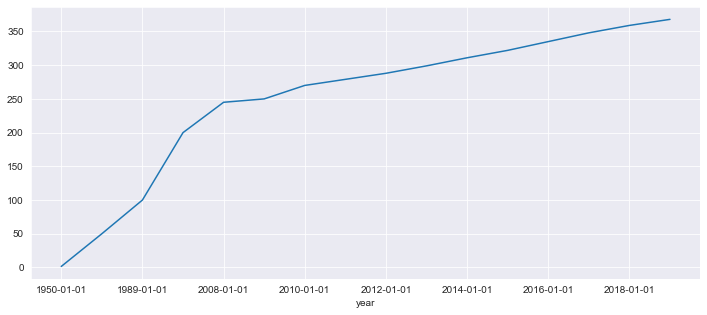

In [10]:
waste_production['production_volume'].plot(figsize=(12,5))

### Check for Stationary

In [13]:
from statsmodels.tsa.stattools import adfuller

def test(data):
    dftest = adfuller(data, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-value : ",dftest[1])
    print("3. Num of Lags :",dftest[2])
    print("4. Number of observations Used for ADF Regression and critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key,": ",val)
test(waste_production['production_volume'])

1. ADF :  -2.2478445240494023
2. P-value :  0.18934089642110558
3. Num of Lags : 5
4. Number of observations Used for ADF Regression and critical Values Calculation : 10
5. Critical Values :
	 1% :  -4.331573
	 5% :  -3.23295
	 10% :  -2.7487


## ForeCasting of Plastic Waste Production

In [14]:
from statsmodels.tsa.arima_model import ARIMA


In [15]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\R.SHANMUKH\anaconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
from pmdarima import auto_arima
# To ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
step_fit = auto_arima(waste_production['production_volume'], trace = True, supress_warnings = True)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=143.231, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=139.358, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=151.241, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=141.300, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=141.245, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=140.010, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.552 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -66.679
Date:                Mon, 25 Jan 2021   AIC                            139.358
Time:                        10:13:01   BIC                            141.482
Sample:                             0   HQIC                           139.336
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.7338     12.778      0.840      0.401     -14.311      35.779
ar.L1          0.5721      0.248      2.308      0.021       0.086       1.058
sigma2       414.1416    126.612      3.271      0.001     165.986     662.297
===================================================================================
Ljung-Box (Q):                        2.04   Jarque-Bera (JB):                13.24
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Spliting data into testing and training

In [18]:
print(waste_production.shape)
train = waste_production.iloc[:-5]
test = waste_production.iloc[-5:]
print(train.shape, test.shape)

(16, 1)
(11, 1) (5, 1)


In [19]:
model = ARIMA(train['production_volume'],order = (1,1,0))

model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.production_volume   No. Observations:                   10
Model:                  ARIMA(1, 1, 0)   Log Likelihood                 -46.270
Method:                        css-mle   S.D. of innovations             24.389
Date:                 Mon, 25 Jan 2021   AIC                             98.540
Time:                         10:13:02   BIC                             99.448
Sample:                              1   HQIC                            97.544
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        30.8360     13.922      2.215      0.027       3.550      58.122
ar.L1.D.production_volume     0.4931      0.261      1.888      0.059      -0.019       1.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0279           +0.0000j            2.0279            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
start = len(train)
end = len(test)+len(train)-1
prediction = model.predict( start = start, end=end, typ= 'levels')
prediction.index = waste_production.index[start:end+1]
print(prediction)

year
2015-01-01    332.547638
2016-01-01    358.803373
2017-01-01    387.380749
2018-01-01    417.102963
2019-01-01    447.389717
dtype: float64


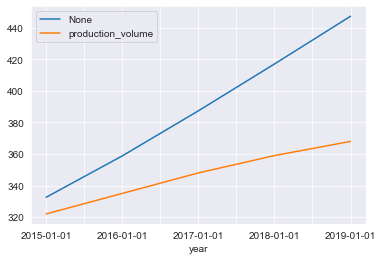

In [21]:
prediction.plot(legend = True)
test['production_volume'].plot(legend = True)

In [22]:
test['production_volume'].mean()

346.4

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(prediction,test['production_volume']))
print(rmse)

48.80036483204542


In [24]:
model2= ARIMA(waste_production['production_volume'], order = (1,1,0))
model2 = model2.fit()
waste_production.tail()

,production_volume
year,
2015-01-01,322.0
2016-01-01,335.0
2017-01-01,348.0
2018-01-01,359.0
2019-01-01,368.0


In [25]:

prediction = model2.predict(start = len(waste_production), end=len(waste_production)+10, typ='levels').rename('ARIMA Predictions')

print(prediction)

15    383.882615
16    403.703134
17    425.776734
18    449.139439
19    473.239709
20    497.761979
21    522.525696
22    547.427558
23    572.408460
24    597.434585
25    622.486584
Name: ARIMA Predictions, dtype: float64


In [26]:
predicted_waste_production = pd.read_csv('https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/plotting%20forecasted%20data%20model2.csv',index_col= 'year')
predicted_waste_production

,production_volume,forecasted_production_volume
year,,
1950,1.5,NaN
1976,50.0,NaN
1989,100.0,NaN
2002,200.0,NaN
2008,245.0,NaN
2009,250.0,NaN
2010,270.0,NaN
2011,279.0,NaN
2012,288.0,NaN


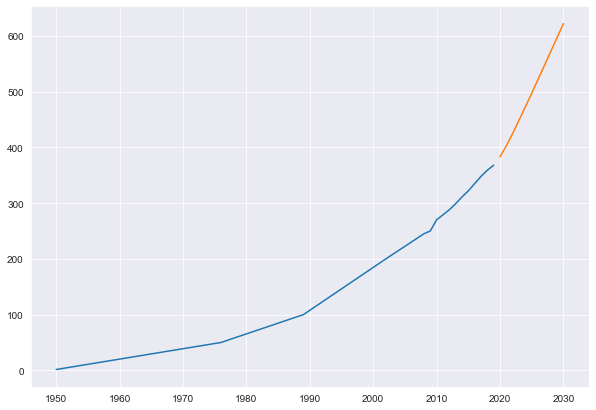

In [54]:
plt.figure(figsize=(10,7))
plt.plot(predicted_waste_production['production_volume'], label='Collected Data')
plt.plot(predicted_waste_production['forecasted_production_volume'],label='Forecasted Data')
plt.show()


# Global Waste Disposal Statistics

In [28]:
global_waste_disposal_readings = pd.read_csv("https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Global%20waste%20disposal%20readings.csv",index_col= 'year')
global_waste_disposal_readings

,recycled,incinerated,discarded
year,,,
1980,0.0,0.0,100.0
1981,0.0,1.7,98.3
1982,0.0,2.4,97.6
1983,0.0,3.1,96.9
1984,0.0,3.8,96.2
1985,0.0,4.5,95.5
1986,0.0,5.2,94.8
1987,0.0,5.9,94.1
1988,0.6,6.6,92.8


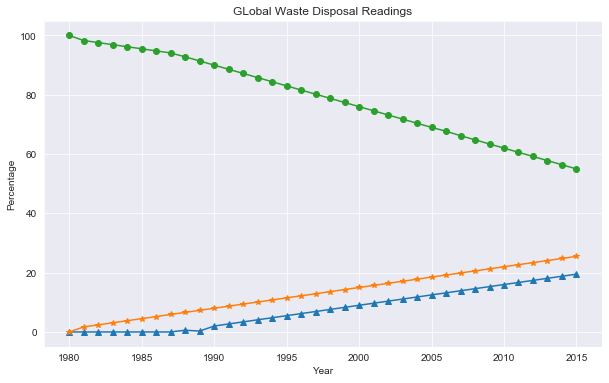

In [55]:
plt.figure(figsize=(10,6))
plt.plot(global_waste_disposal_readings['recycled'], label='Recycled percentage',marker ='^')
plt.plot(global_waste_disposal_readings['incinerated'],label='Incinerated percentage',marker='*')
plt.plot(global_waste_disposal_readings['discarded'],label='Discarded percentage',marker='o')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("GLobal Waste Disposal Readings")
plt.show()


In [30]:
step_fit1 = auto_arima(global_waste_disposal_readings['recycled'], trace = True, supress_warnings = True)
step_fit1.summary()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=22.737, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=40.461, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=19.904, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=22.865, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=18.766, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=20.766, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=20.766, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=19.220, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=22.765, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=19.881, Time=0.04 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.383 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 2, 0)   Log Likelihood                  -6.383
Date:                Mon, 25 Jan 2021   AIC                             18.766
Time:                        10:13:05   BIC                             23.345
Sample:                             0   HQIC                            20.327
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8924      0.106     -8.382      0.000      -1.101      -0.684
ar.L2         -0.2886      0.147     -1.960      0.050      -0.577    -4.6e-05
sigma2         0.0832      0.010      8.513      0.000       0.064       0.102
===================================================================================
Ljung-Box (Q):                        1.05   Jarque-Bera (JB):               248.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
step_fit2 = auto_arima(global_waste_disposal_readings['incinerated'], trace = True, supress_warnings = True)
step_fit2.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14.135, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22.126, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=nan, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80.943, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18.128, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.390 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  13.063
Date:                Mon, 25 Jan 2021   AIC                            -22.126
Time:                        10:13:06   BIC                            -19.015
Sample:                             0   HQIC                           -21.052
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7286   9.73e-05   7490.259      0.000       0.728       0.729
sigma2         0.0278      0.002     16.799      0.000       0.025       0.031
===================================================================================
Ljung-Box (Q):                        2.98   Jarque-Bera (JB):              1501.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             5.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
step_fit3 = auto_arima(global_waste_disposal_readings['discarded'], trace = True, supress_warnings = True)
step_fit3.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12.370, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10.090, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5.957, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=120.458, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9.025, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8.626, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8.050, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.835 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 0)   Log Likelihood                   8.045
Date:                Mon, 25 Jan 2021   AIC                            -10.090
Time:                        10:13:06   BIC                             -5.424
Sample:                             0   HQIC                            -8.479
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3676      0.154     -2.392      0.017      -0.669      -0.066
ar.L1          0.7215      0.128      5.648      0.000       0.471       0.972
sigma2         0.0362      0.007      5.165      0.000       0.022       0.050
===================================================================================
Ljung-Box (Q):                       12.37   Jarque-Bera (JB):               225.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Testing and training for recycled percentages

In [33]:
recycled = pd.read_csv("https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Recycled%20test%20and%20train.csv", index_col = 'year')

print(recycled.shape)
train_r = recycled.iloc[:-5]
test_r = recycled.iloc[-5:]
print(train_r.shape, test_r.shape)

(36, 1)
(31, 1) (5, 1)


In [34]:
model_r = ARIMA(train_r['recycled'],order = (2,2,0))

model_r = model_r.fit()
model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D2.recycled   No. Observations:                   29
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  -7.366
Method:                       css-mle   S.D. of innovations              0.307
Date:                Mon, 25 Jan 2021   AIC                             22.732
Time:                        10:13:07   BIC                             28.201
Sample:                             2   HQIC                            24.445
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0253      0.026      0.961      0.337      -0.026       0.077
ar.L1.D2.recycled    -0.9100      0.172     -5.303      0.000      -1.246      -0.574
ar.L2.D2.recycled    -0.3071      0.169     -1.817      0.069      -0.638       0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4818           -1.0300j            1.8046           -0.4033
AR.2           -1.4818           +1.0300j            1.8046            0.4033
-----------------------------------------------------------------------------
"""

In [35]:
start = len(train_r)
end = len(test_r)+len(train_r)-1
prediction_r = model_r.predict( start = start, end=end, typ= 'levels')
prediction_r.index = recycled.index[start:end+1]
print(prediction_r)

year
2011    16.756179
2012    17.517414
2013    18.312976
2014    19.131927
2015    19.975232
dtype: float64


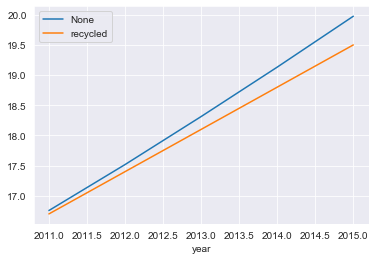

In [36]:
prediction_r.plot(legend = True)
test_r['recycled'].plot(legend = True)

In [37]:
test_r['recycled'].mean()


18.1

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_r = sqrt(mean_squared_error(prediction_r,test_r['recycled']))
print(rmse_r)

0.28224873569939607


In [39]:
model2_r= ARIMA(recycled['recycled'], order = (2,2,0))
model2_r = model2_r.fit()
recycled.tail()

,recycled
year,
2011,16.7
2012,17.4
2013,18.1
2014,18.8
2015,19.5


In [40]:
prediction_r = model2_r.predict(start = len(recycled), end=len(recycled)+58, typ='levels').rename('ARIMA Predictions')

print(prediction_r)

34    20.247578
35    20.999395
36    21.780341
37    22.581032
38    23.402385
39    24.246441
40    25.111059
41    25.997564
42    26.905406
43    27.834680
44    28.785468
45    29.757666
46    30.751343
47    31.766468
48    32.803049
49    33.861088
50    34.940580
51    36.041529
52    37.163933
53    38.307794
54    39.473109
55    40.659881
56    41.868108
57    43.097791
58    44.348930
59    45.621524
60    46.915574
61    48.231079
62    49.568041
63    50.926458
64    52.306330
65    53.707659
66    55.130443
67    56.574682
68    58.040378
69    59.527529
70    61.036135
71    62.566198
72    64.117716
73    65.690689
74    67.285119
75    68.901004
76    70.538345
77    72.197141
78    73.877393
79    75.579101
80    77.302265
81    79.046884
82    80.812959
83    82.600489
84    84.409475
85    86.239917
86    88.091815
87    89.965168
88    91.859977
89    93.776241
90    95.713962
91    97.673138
92    99.653769
Name: ARIMA Predictions, dtype: float64


In [41]:
recycled_predictions = pd.read_csv("https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Recycled%20predictions.csv", index_col = 'year')
recycled_predictions

,recycled,recycled_predictions
year,,
1980,0.0,NaN
1981,0.0,NaN
1982,0.0,NaN
1983,0.0,NaN
1984,0.0,NaN
...,...,...
2070,NaN,91.859977
2071,NaN,93.776241
2072,NaN,95.713962


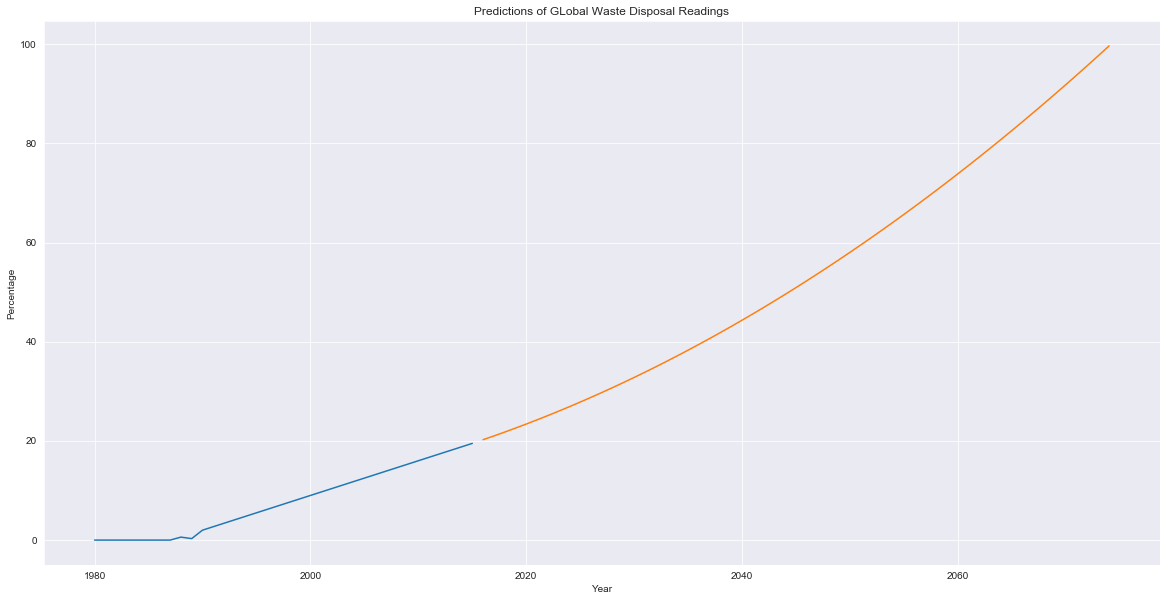

In [42]:
plt.figure(figsize=(20,10))
plt.plot(recycled_predictions['recycled'], label='Collected Data')
plt.plot(recycled_predictions['recycled_predictions'],label='Forecasted Data')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Predictions of GLobal Waste Disposal Readings")
plt.show()

## Testing and training for Discarded percentages 

In [43]:
discarded = pd.read_csv('https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/discarded%20test%20and%20train.csv', index_col = 'year')
print(discarded.shape)
train_d = discarded.iloc[:-5]
test_d = discarded.iloc[-5:]
print(train_d.shape, test_d.shape)

(36, 1)
(31, 1) (5, 1)


In [44]:
model_d = ARIMA(train_d['discarded'],order = (1,1,0))

model_d = model_d.fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.discarded   No. Observations:                   30
Model:                 ARIMA(1, 1, 0)   Log Likelihood                   4.568
Method:                       css-mle   S.D. of innovations              0.205
Date:                Mon, 25 Jan 2021   AIC                             -3.135
Time:                        10:13:10   BIC                              1.069
Sample:                             1   HQIC                            -1.790
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3068      0.123    -10.662      0.000      -1.547      -1.067
ar.L1.D.discarded     0.7121      0.128      5.576      0.000       0.462       0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4043           +0.0000j            1.4043            0.0000
-----------------------------------------------------------------------------
"""

In [45]:
start = len(train_d)
end = len(test_d)+len(train_d)-1
prediction_d = model_d.predict( start = start, end=end, typ= 'levels')
prediction_d.index = discarded.index[start:end+1]
print(prediction_d)

year
2011    60.626838
2012    59.272788
2013    57.932347
2014    56.601599
2015    55.277751
dtype: float64


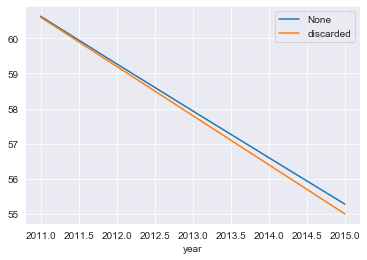

In [46]:
prediction_d.plot(legend = True)
test_d['discarded'].plot(legend = True)

In [47]:
test_d['discarded'].mean()

57.8

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_d = sqrt(mean_squared_error(prediction_d,test_d['discarded']))
print(rmse_d)

0.16812027293040044


In [49]:
model2_d= ARIMA(discarded['discarded'], order = (1,1,0))
model2_d = model2_d.fit()
discarded.tail()

,discarded
year,
2011,60.6
2012,59.2
2013,57.8
2014,56.4
2015,55.0


In [50]:
prediction_d = model2_d.predict(start = len(discarded), end=len(discarded)+40, typ='levels').rename('ARIMA Predictions')

print(prediction_d)

35    53.622329
36    52.260771
37    50.910838
38    49.569295
39    48.233804
40    46.902681
41    45.574710
42    44.249013
43    42.924957
44    41.602085
45    40.280068
46    38.958667
47    37.637710
48    36.317075
49    34.996671
50    33.676435
51    32.356319
52    31.036290
53    29.716323
54    28.396402
55    27.076514
56    25.756650
57    24.436802
58    23.116967
59    21.797140
60    20.477320
61    19.157505
62    17.837692
63    16.517883
64    15.198075
65    13.878268
66    12.558462
67    11.238657
68     9.918852
69     8.599048
70     7.279244
71     5.959440
72     4.639636
73     3.319832
74     2.000028
75     0.680225
Name: ARIMA Predictions, dtype: float64


In [51]:
discarded_predictions = pd.read_csv('https://raw.githubusercontent.com/SHANMUKH-R/World-wide-waste-generation-statistics/main/Discarded%20predictions.csv', index_col = 'year')
discarded_predictions

,discarded,dicarded_predictions
year,,
1980.0,100.0,NaN
1981.0,98.3,NaN
1982.0,97.6,NaN
1983.0,96.9,NaN
1984.0,96.2,NaN
...,...,...
2053.0,NaN,4.639636
2054.0,NaN,3.319832
2055.0,NaN,2.000028


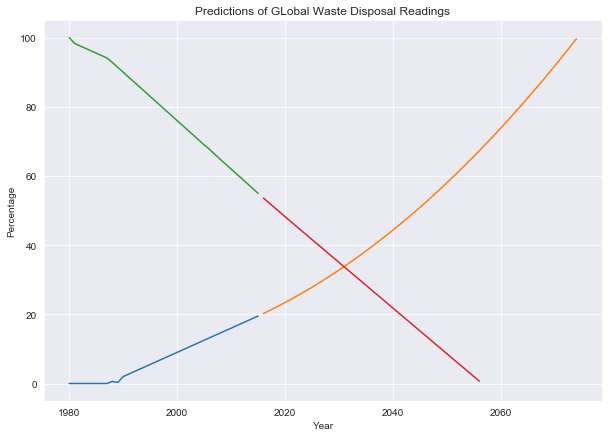

In [56]:
plt.figure(figsize=(10,7))
plt.plot(recycled_predictions['recycled'], label='Collected Data')
plt.plot(recycled_predictions['recycled_predictions'],label='Forecasted Data')
plt.plot(discarded_predictions['discarded'], label='Collected Data')
plt.plot(discarded_predictions['dicarded_predictions'],label='Forecasted Data')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Predictions of GLobal Waste Disposal Readings")
plt.show()